### 0. 본인 크롬의 버전을 확인하고 같은 버전의 Chrome Driver를 다운로드 해주세요
- 저는 현재 110버전이므로 크롬 드라이버도 110으로 다운로드 하면 됩니다.
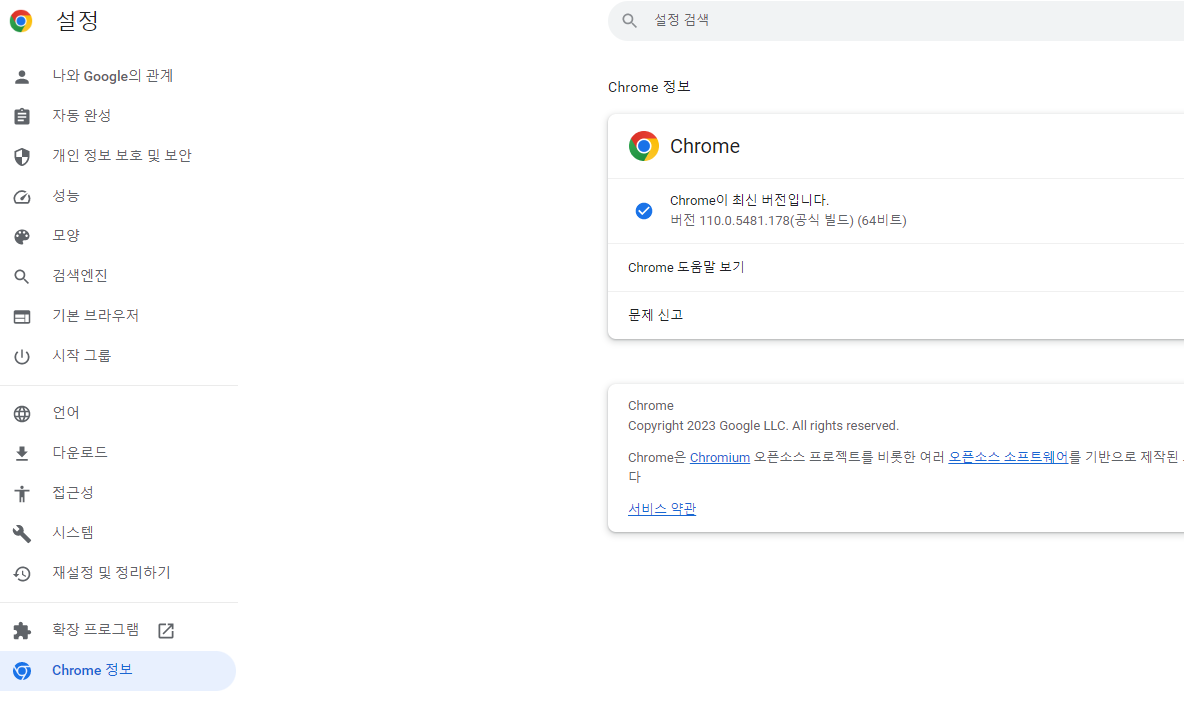

### 1. 바탕화면에 새 폴더를 만들어 주세요
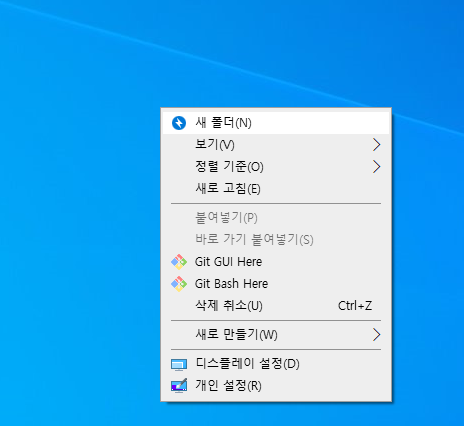

### 2. 새 폴더에 크롤링 파일을 넣어주세요
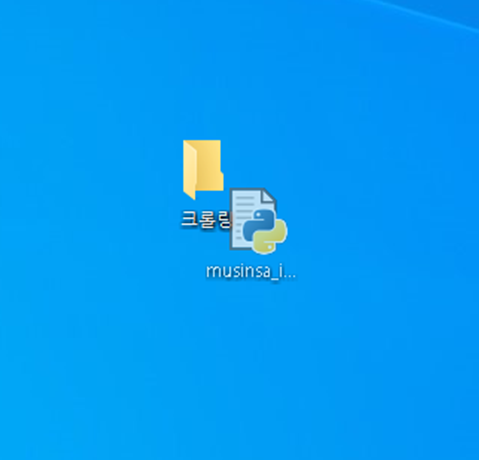

### 3. 같은 폴더에 크롬 드라이버도 같이 넣어주세요
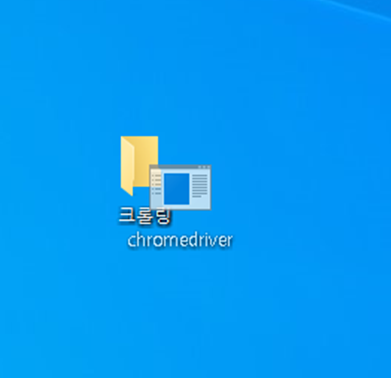

### 4. 크롤링 파일에서 자신이 맡은 부분의 주석만 해제 하세요
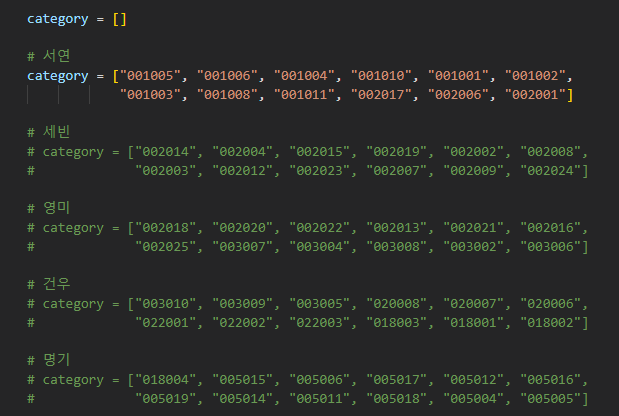

# ===== 주의사항 =====
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
    - 절대 github 연동된 work-space에서 실행하지마
#### 만약 실행하자마자 오류가 난다면 이 중 하납니다.
- 코드를 임의로 수정했다.
- 크롬드라이버 버전이 맞지않거나 크롤링 파일과 같은 폴더에 없다.
- 위에서 로드한 라이브러리가 설치되어있지 않다.
#### 크롤링이 느려질 수 있으니 크롤링 실행 전에 컴퓨터를 다시시작 해주세요... 전원 끄시면 안됩니다.
# ===== 주의사항 =====

In [ ]:
# 여기서 에러가 나면 pip으로 selenium을 하거나 라이브러리 업그레이드하기
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from urllib import request
import time
import os
import pandas as pd

In [ ]:
category = []

# 서연
# category = ["001005", "001006", "001004", "001010", "001001", "001002",
#             "001003", "001008", "001011", "002017", "002006", "002001"]

# 세빈
# category = ["002014", "002004", "002015", "002019", "002002", "002008",
#             "002003", "002012", "002023", "002007", "002009", "002024"]

# 영미
# category = ["002018", "002020", "002022", "002013", "002021", "002016",
#             "002025", "003007", "003004", "003008", "003002", "003006"]

# 건우
# category = ["003010", "003009", "003005", "020008", "020007", "020006",
#             "022001", "022002", "022003", "018003", "018001", "018002"]

# 명기
# category = ["018004", "005015", "005006", "005017", "005012", "005016",
#             "005019", "005014", "005011", "005018", "005004", "005005"]

In [ ]:

# 현재 musinsa_img.ipynb 파일이 있는 곳에 imgs라는 폴더 생성
try:
    os.mkdir("./imgs")
except:
    pass

# 크롬을 실행하여 무신사 페이지로 이동
driver = wd.Chrome()
driver.get(url="https://www.musinsa.com/app/")

for cat in category:
    
    # 본인이 지정된 category 리스트로 페이지 이동
    driver.get(url="https://www.musinsa.com/categories/item/{}".format(cat))
    
    # 현재 category의 total_page 구하기
    total_page = int(driver.find_element(By.CSS_SELECTOR, value="#goods_list > div.boxed-list-wrapper > div.thumbType_box.box > span.pagingNumber > span.totalPagingNum").text)

    # 무신사는 페이징을 400까지 구현하였기 때문에 400이 넘어가는 경우 400으로 고정
    if total_page > 400:
        total_page = 400

    for page in range(1, total_page + 1):
        # 현재 category의 total_page까지 페이지 이동
        driver.get("https://www.musinsa.com/categories/item/{}?d_cat_cd={}&brand=&list_kind=small&sort=pop_category&sub_sort=&page={}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure=".format(cat, cat, page))
        
        # 현재 page의 모든 상품 고유 주소 구하기
        it_list = driver.find_elements(By.CSS_SELECTOR, value="#searchList > li")
        
        # 현재 상황 출력
        print("현재 페이지 : {}\n페이지의 상품 개수 : {}".format(page, len(it_list)))
        
        for it in it_list:
            # 새 창을 띄워 획득한 상품 고유 주소로 이동
            data_no = it.get_attribute("data-no")
            driver.execute_script("window.open('');")
            driver.switch_to.window(driver.window_handles[-1])
            driver.get("https://www.musinsa.com/app/goods/{}".format(data_no))
            thumb_list = driver.find_elements(By.CSS_SELECTOR, value="#detail_thumb > ul > li")
            # 해당 상품의 모든 사진을 imgs 폴더에 저장
            for idx in range(len(thumb_list)):
                thumb_list[idx].click()
                img = driver.find_element(By.CSS_SELECTOR, value="#bigimg")
                request.urlretrieve(img.get_attribute("src"), "./imgs/{}_{}.jpg".format(data_no, idx))
            # 새 창 닫기
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
# 크롬 종료
driver.close()

